In [8]:
# Import necessary libraries
import sys
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
import seaborn as sns        # For statistical data visualization
import tensorflow as tf      # TensorFlow for deep learning
import random
# Import specific modules from TensorFlow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D,Dropout, Flatten, Dense# Sequential model for building a linear stack of layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip drive/My\ Drive/images.zip

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

# Code


In [4]:
# Specify the base path where your image data is stored
base_path = '/content/real_vs_fake/real-vs-fake/'


# Create an ImageDataGenerator for image preprocessing and augmentation
image_gen = ImageDataGenerator(rescale=1./255.,
                               rotation_range=20,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')
# The 'rescale' parameter normalizes pixel values to the range [0, 1] by dividing each pixel value by 255

In [5]:
Baseline_train = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)
Baseline_valid = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)
Baseline_test = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [6]:
# Initialising the CNN
model = Sequential()
model.add(Convolution2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [10]:
Baseline_history = model.fit(Baseline_train,
                         epochs = 100,
                         validation_data = Baseline_valid, callbacks=[early_stopping])

Epoch 1/100
1563/1563 [==============================] - 1288s 818ms/step - loss: 0.6874 - accuracy: 0.5390 - val_loss: 0.6768 - val_accuracy: 0.5752
Epoch 2/100
1563/1563 [==============================] - 1274s 815ms/step - loss: 0.6711 - accuracy: 0.5879 - val_loss: 0.6572 - val_accuracy: 0.6087
Epoch 3/100
1563/1563 [==============================] - 1279s 818ms/step - loss: 0.6559 - accuracy: 0.6107 - val_loss: 0.6521 - val_accuracy: 0.6137
Epoch 4/100
1563/1563 [==============================] - 1275s 815ms/step - loss: 0.6472 - accuracy: 0.6233 - val_loss: 0.6391 - val_accuracy: 0.6338
Epoch 5/100
1563/1563 [==============================] - 1291s 826ms/step - loss: 0.6370 - accuracy: 0.6377 - val_loss: 0.6277 - val_accuracy: 0.6485
Epoch 6/100
1563/1563 [==============================] - 1297s 830ms/step - loss: 0.6220 - accuracy: 0.6549 - val_loss: 0.6108 - val_accuracy: 0.6670
Epoch 7/100
1563/1563 [==============================] - 1295s 829ms/step - loss: 0.6063 - accuracy:

In [11]:
import pickle
with open('/content/drive/MyDrive/face2face/models/Baseline_history.pkl', 'wb') as f:
    pickle.dump(Baseline_history, f)
with open('/content/drive/MyDrive/face2face/models/Baseline.pkl', 'wb') as f:
    pickle.dump(model, f)

In [12]:
model.evaluate(Baseline_test)

313/313 [==============================] - 217s 695ms/step - loss: 0.3987 - accuracy: 0.8196


[0.39870375394821167, 0.819599986076355]

In [13]:
predictions = model.predict(Baseline_test)

313/313 [==============================] - 216s 689ms/step


In [14]:
y_pred = (predictions > 0.5).astype(int)

In [15]:
y_true = Baseline_test.classes

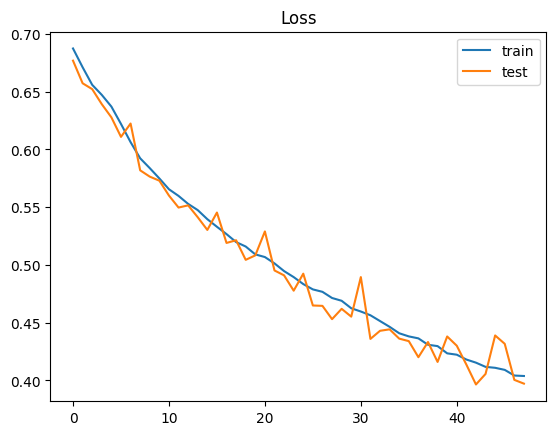

In [16]:
plt.plot(Baseline_history.history['loss'], label='train')
plt.plot(Baseline_history.history['val_loss'], label='test')
plt.legend()
plt.title('Loss')
plt.show()

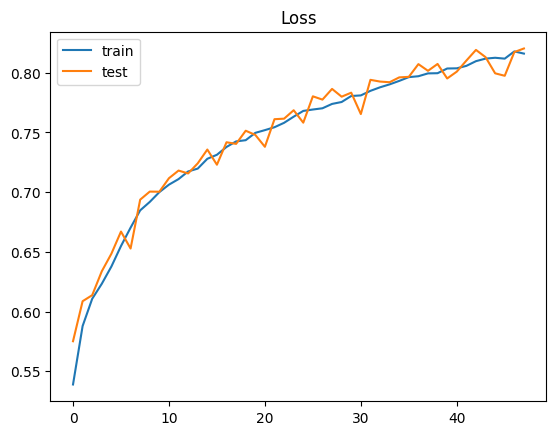

In [17]:
plt.plot(Baseline_history.history['accuracy'], label='train')
plt.plot(Baseline_history.history['val_accuracy'], label='test')
plt.legend()
plt.title('Loss')
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
confusion_matrix(y_true, y_pred)

array([[4898, 5102],
       [4828, 5172]])

In [20]:
Baseline_metrics = classification_report(y_true, y_pred)

In [21]:
print(Baseline_metrics)

              precision    recall  f1-score   support

           0       0.50      0.49      0.50     10000
           1       0.50      0.52      0.51     10000

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

